## Load Data from CSVs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Most basic and naive way to read a csv file as a List of dictionary

import unicodecsv

enrollments = []
f = open('enrollments.csv', 'rb')   # read file in binary mode
reader = unicodecsv.DictReader(f)   # Read csv as dictonary

for row in reader:
    enrollments.append(row)
    
f.close()

enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [3]:
# A better and concise code to do the same as above

with open('enrollments.csv', 'rb') as f:
    enrollments = list(unicodecsv.DictReader(f))

print("Printing first Row of enrollments :")
enrollments[0]

Printing first Row of enrollments :


{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [4]:
## Read in the data from daily_engagement.csv and project_submissions.csv 

with open('daily_engagement.csv', 'rb') as f:
    daily_engagement = list(unicodecsv.DictReader(f))
    
with open('project_submissions.csv', 'rb') as f:
    project_submissions = list(unicodecsv.DictReader(f))

In [5]:
print("Printing first Row of daily_engagement :")
daily_engagement[0]

Printing first Row of daily_engagement :


{'acct': '0',
 'lessons_completed': '0.0',
 'num_courses_visited': '1.0',
 'projects_completed': '0.0',
 'total_minutes_visited': '11.6793745',
 'utc_date': '2015-01-09'}

In [6]:
print("Printing first Row of project_submissions :")
project_submissions[0]

Printing first Row of project_submissions :


{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': '2015-01-16',
 'creation_date': '2015-01-14',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Fixing Data Types

In [7]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [8]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [9]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [10]:
## Rename the "acct" column in the daily_engagement table to "account_key" so that we can write  
## a function to get unique students given any of the three datasets
for engagement in daily_engagement:
    engagement['account_key']=engagement['acct']
    del engagement['acct']

In [11]:
# Function to get unique students from any of the three datasets
def get_unique_students(data):
   return set([data_point['account_key'] for data_point in data])

In [12]:
## Total number of rows and the number of unique students (account keys) in each table.

enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = len(get_unique_students(enrollments))

engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = len(get_unique_students(daily_engagement))

submission_num_rows = len(project_submissions)
submission_num_unique_students = len(get_unique_students(project_submissions))

print("Printing total number of rows and unique students in enrollments")
print(enrollment_num_rows)
print(enrollment_num_unique_students)
      
print("Printing total number of rows and unique students in daily engagement")
print(engagement_num_rows)
print(engagement_num_unique_students)
      
print("Printing total number of rows and unique students in project submissions")
print(submission_num_rows)
print(submission_num_unique_students)

Printing total number of rows and unique students in enrollments
1640
1302
Printing total number of rows and unique students in daily engagement
136240
1237
Printing total number of rows and unique students in project submissions
3642
743


## Problems in the Data

## Missing Engagement Records

In [13]:
## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
unique_enrollments = get_unique_students(enrollments)
unique_engagements = get_unique_students(daily_engagement)
missing_account_keys = unique_enrollments-unique_engagements
missing_account_key = list(missing_account_keys)[0]
for enrollment in enrollments:
    if enrollment['account_key'] == missing_account_key:
        print(enrollment)

{'is_canceled': True, 'account_key': '654', 'days_to_cancel': 0, 'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), 'status': 'canceled', 'is_udacity': False, 'join_date': datetime.datetime(2014, 12, 4, 0, 0)}
{'is_canceled': True, 'account_key': '654', 'days_to_cancel': 0, 'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), 'status': 'canceled', 'is_udacity': False, 'join_date': datetime.datetime(2014, 12, 4, 0, 0)}
{'is_canceled': True, 'account_key': '654', 'days_to_cancel': 0, 'cancel_date': datetime.datetime(2014, 12, 3, 0, 0), 'status': 'canceled', 'is_udacity': False, 'join_date': datetime.datetime(2014, 12, 3, 0, 0)}


The cause of this error is the joining date and cancelling date being the same
Thats why there is no entry for such a student in daily engagement table

## Checking for More Problem Records

In [14]:
## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
count = 0
for enrollment in enrollments:
        if enrollment['account_key'] in missing_account_keys and enrollment['join_date'] != enrollment['cancel_date'] :
            print(enrollment)
            count = count +1
count

{'is_canceled': True, 'account_key': '1304', 'days_to_cancel': 59, 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'status': 'canceled', 'is_udacity': True, 'join_date': datetime.datetime(2015, 1, 10, 0, 0)}
{'is_canceled': True, 'account_key': '1304', 'days_to_cancel': 99, 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'status': 'canceled', 'is_udacity': True, 'join_date': datetime.datetime(2015, 3, 10, 0, 0)}
{'is_canceled': False, 'account_key': '1101', 'days_to_cancel': None, 'cancel_date': None, 'status': 'current', 'is_udacity': True, 'join_date': datetime.datetime(2015, 2, 25, 0, 0)}


3


These are the records whos joining date and cancel date are not same, but still are missing from the engagement table.
so, we need to investigate why these elements were missing. If you notice, these entries have `is_udacity=true`. That means these are the test accounts. So, these can be removed from all the datasets.

## Tracking Down the Remaining Problems

In [15]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [16]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [17]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [18]:
## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for student in non_udacity_enrollments:
    if (not student['is_canceled'] or student['days_to_cancel']>7):
        account_key = student['account_key']
        enrollment_date = student['join_date']
        if account_key not in paid_students or \
        enrollment_date>paid_students[account_key]:
            paid_students[account_key]=enrollment_date
print(len(paid_students))

995


In case a student has multiple entries in the enrollment table, since a student can enroll and cancel and enroll again. In that case, to avoid putting a randomly chosen enrollment date being put, we are putting the latest enrollment date in the dictionary.

## Getting Data from First Week

In [19]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0

In [20]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if (data_point['account_key'] in list(paid_students.keys())):
            new_data.append(data_point)
    return new_data

In [21]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [22]:
## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = list()
for engagement in paid_engagement:
    account_key = engagement['account_key']
    engagement_date = engagement['utc_date']
    if within_one_week(paid_students.get(account_key),engagement_date):
        paid_engagement_in_first_week.append(engagement)

len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [23]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [24]:
def values_by_account(engagement_by_account, name):
    final_dict = {}
    for key,list_engagement in engagement_by_account.items():
        total_value = 0;
        for engagement in list_engagement:
            total_value += engagement[name]
        final_dict[key] = total_value
    return final_dict

In [25]:
def describe_data(data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    plt.hist(data)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


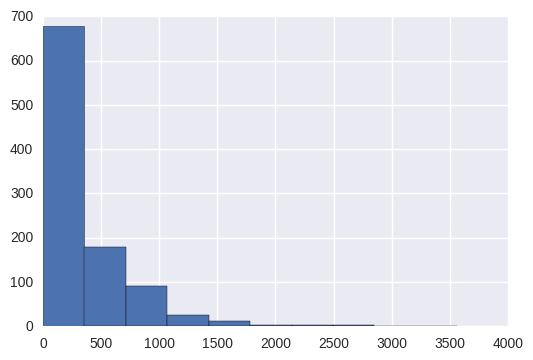

In [26]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

total_minutes_by_account = values_by_account(engagement_by_account, 'total_minutes_visited')
describe_data(list(total_minutes_by_account.values()))

## Debugging Data Analysis Code

In [27]:
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
max_key = None
max_value=0
for key in list(total_minutes_by_account.keys()):
    if total_minutes_by_account[key] > max_value:
        max_key = key
        max_value = total_minutes_by_account[key]
if max_key in paid_students:
    print('true')
for en in paid_engagement_in_first_week:
    if en['account_key']==max_key:
        print(en)

true
{'num_courses_visited': 4, 'account_key': '163', 'total_minutes_visited': 850.519339666, 'lessons_completed': 4, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{'num_courses_visited': 6, 'account_key': '163', 'total_minutes_visited': 872.633923334, 'lessons_completed': 6, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{'num_courses_visited': 2, 'account_key': '163', 'total_minutes_visited': 777.018903666, 'lessons_completed': 6, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{'num_courses_visited': 1, 'account_key': '163', 'total_minutes_visited': 294.568774, 'lessons_completed': 2, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{'num_courses_visited': 3, 'account_key': '163', 'total_minutes_visited': 471.2139785, 'lessons_completed': 1, 'projects_completed': 0, 'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{'num_courses_visited': 2, 'account_key': '163', 'total_minut

The bug was in the within_one_week function. It was just checking that engagement date was not more than 7 days ahead of enrollment date. But actually, we should also check that it didn't belong to a past date, as students are allowed to enroll, do some engagements and then cancel and then enroll again. So, the final engagements was counting all the past engagements as well and not just the engagements falling in the next 7 days. Changing the final line in function fixed it.

## Lessons Completed in First Week

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


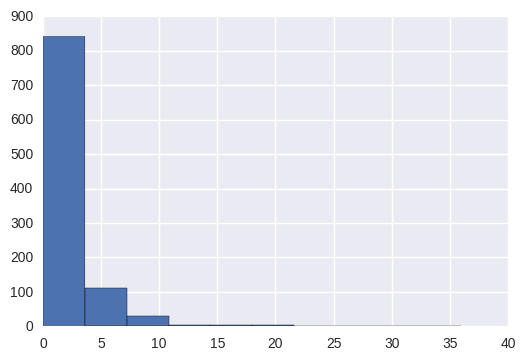

In [28]:
# Create a dictionary with the total lessons each student learnt in the classroom during the first week.
# The keys are account keys, and the values are numbers (total lessons)

## Find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week.

total_lessons_by_account = values_by_account(engagement_by_account,'lessons_completed')
describe_data(list(total_lessons_by_account.values()))

## Number of Visits in First Week

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


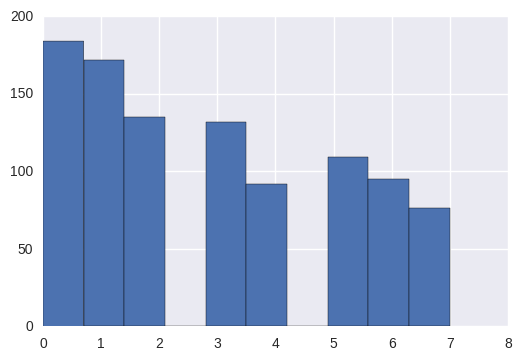

In [29]:
## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for engagements in list(engagement_by_account.values()):
    for engagement in engagements:
        if engagement['num_courses_visited']>0:
            engagement['has_visited']=1
        else:
            engagement['has_visited']=0

days_by_account = values_by_account(engagement_by_account, 'has_visited')
describe_data(list(days_by_account.values()))

## Splitting out Passing Students

In [30]:
pass_subway_project = set()

subway_project_lesson_keys = ['746169184', '3176718735']

for submission in paid_submissions:
    key = submission['account_key']
    lesson_key = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if (lesson_key in subway_project_lesson_keys and (rating=='PASSED' or rating=='DISTINCTION')):
        pass_subway_project.add(key)

len(pass_subway_project)

647

In [31]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

passing_engagement = []
non_passing_engagement = []

for engagement in paid_engagement_in_first_week:
    key = engagement['account_key']
    if key in pass_subway_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

Describing minutes in first week who pass their first project
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


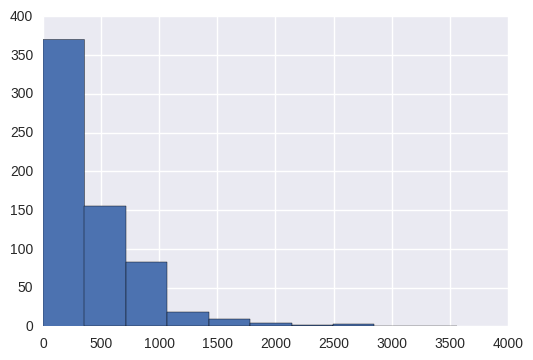

In [32]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

print("Describing minutes in first week who pass their first project")
passing_minutes_by_account = values_by_account(passing_engagement_by_account,'total_minutes_visited')
describe_data(list(passing_minutes_by_account.values()))

Describing minutes in first week who don't pass their first project
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


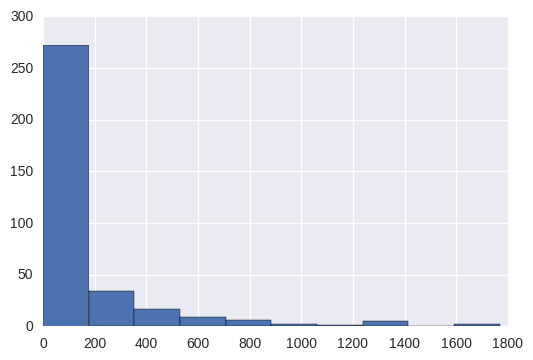

In [33]:
print("Describing minutes in first week who don't pass their first project")
non_passing_minutes_by_account = values_by_account(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(list(non_passing_minutes_by_account.values()))

## Improving Plots and Sharing Findings

Describing lessons in first week who pass their first project
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


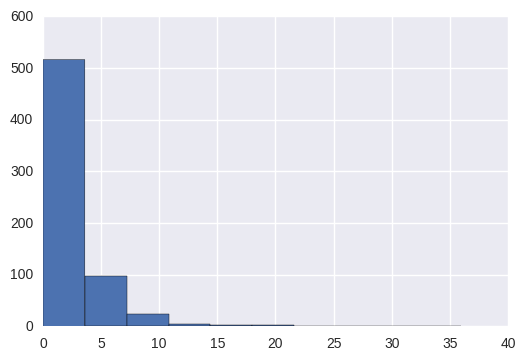

In [34]:
print("Describing lessons in first week who pass their first project")
passing_lessons_by_account = values_by_account(passing_engagement_by_account,'lessons_completed')
describe_data(list(passing_lessons_by_account.values()))

Describing lessons in first week who don't pass their first project
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


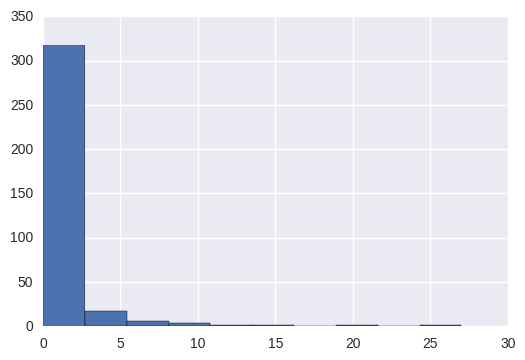

In [35]:
print("Describing lessons in first week who don't pass their first project")
non_passing_lessons_by_account = values_by_account(non_passing_engagement_by_account,'lessons_completed')
describe_data(list(non_passing_lessons_by_account.values()))

Describing visited days in first week who pass their first project
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


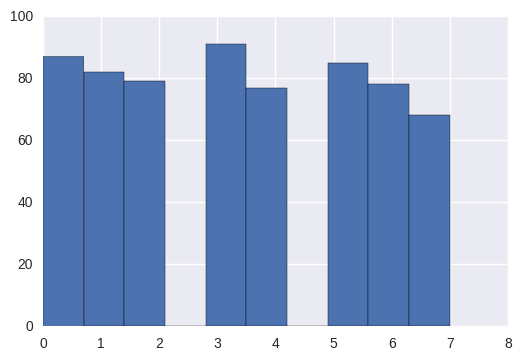

In [36]:
print("Describing visited days in first week who pass their first project")
passing_days_by_account = values_by_account(passing_engagement_by_account, 'has_visited')
describe_data(list(passing_days_by_account.values()))

Describing visited days in first week who don't pass their first project
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


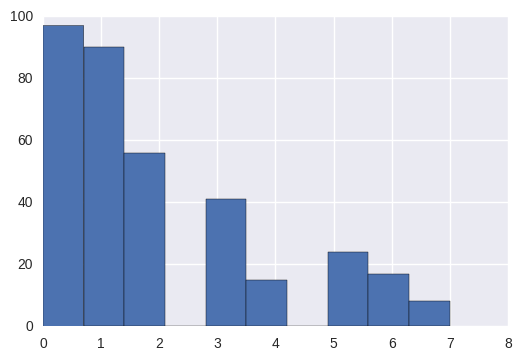

In [37]:
print("Describing visited days in first week who don't pass their first project")
non_passing_days_by_account = values_by_account(non_passing_engagement_by_account, 'has_visited')
describe_data(list(non_passing_days_by_account.values()))

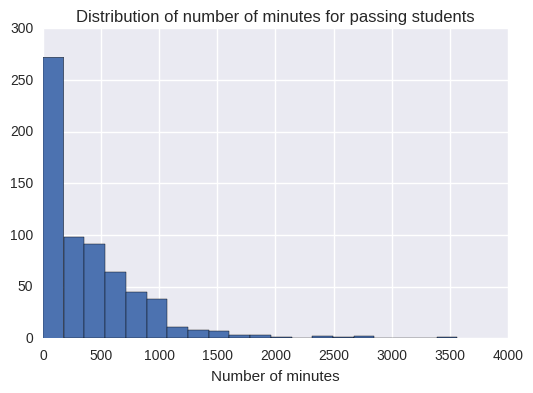

In [38]:
## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
data = list(passing_minutes_by_account.values())
plt.hist(data, bins=20)
plt.xlabel("Number of minutes")
plt.title("Distribution of number of minutes for passing students")